## <center>Report for homework02 IFT6390</center>

#### Team Member
Qiang Ye (20139927), Lifeng Wan (20108546)
#### Coding Environment
python 3.5.2, numpy 1.14.2 matplotlib 2.2.0

---------------

### 1. Linear and non-linear regularized regression (50pts)

#### 1.1 Linear Regression

Let’s consider a regression problem for which we have a training dataset $D_n$ with $n$ samples (input, target):

<center>$D_n = \{(\ \mathbf x^{(1)}, t^{(1)}\ ), ..., (\ \mathbf x^{(n)}, t^{(n)}\ )\}$</center>
with $\mathbf x^{(i)} \in \mathbb R^d$, and $t^{(i)} \in \mathbb R$

The linear regression assumes a parametrized form for the function $f$ which predicts the value of the target from a new data point $\mathbf x$. (More precisely, it seeks to predict the expectation of the target variable conditioned on the input variable $f(x) \simeq \mathbb E[t\ |\ \mathbf x]$.)

The parametrization is a linear transformation of the input, or more precisely an affine transformation.

<center>$f(\mathbf x) = \mathbf w^T \mathbf x + b$</center>

$1.\ $ Precise this model’s set of parameters $\theta$, as well as the nature and dimensionality of each of them.

#### Answer

$\theta$ = {$\mathbf w$, b}, where $\mathbf w \in ℝ^d$ (a d-dimensional weight vector) and $b \in ℝ$(bias).

$2.\ $ The loss function typically used for linear regression is the quadratic loss:
<br><br>
<center>$L((\mathbf x, t), \ f) = (f(\mathbf x) - t)^2$</center>

We are now defining the $\mathbf{empirical risk}\ \hat R$ on the set $D_n$ as the $\mathbf sum$ of the losses on this set (instead of the average of the losses as it is sometimes defined). Give the precise mathematical formula of this risk.

#### Answer

$\hat{R}(f_\theta,D_n) = \sum_{i=1}^{n} \ (f(\ x^{(i)}\ ) - t^{(i)}\ )^2$

$3.\ $Following the principle of Empirical Risk Minimization (ERM), we are going to seek the parameters which yield the smallest quadratic loss. Write a mathematical formulation of this minimization problem.

#### Answer

$\begin{equation}
\theta^{\star} = \underset{\theta}{argmin} \ {\hat{R}(f_\theta,D_n)}
\end{equation}$

$4.\ $A general algorithm for solving this optimization problem is gradient descent. Give a formula for the gradient of the empirical risk with respect to each parameter.

#### Answer

$
\triangledown \hat{R}(\theta) = {\partial \hat{R}(\theta) \over \partial \theta} = 
\left( \begin{align}
& \partial \hat{R}(\theta) \over \partial w_1 \\
& \partial \hat{R}(\theta) \over \partial w_2 \\
& . \\
& . \\
& . \\
& \partial \hat{R}(\theta) \over \partial w_d    \\
& \partial \hat{R}(\theta) \over \partial b
\end{align}
\right)
$
<br>
For each $1\leq k \leq d$, <br>
${\partial \hat{R}\ (\theta) \over \partial w_k} = 2 \sum_{i=1}^{n} \ (f(x^{(i)}) - t^{(i)}) x_k^{(i)}$ <br>
${\partial \hat{R}\ (\theta) \over \partial b} = 2 \sum_{i=1}^{n} \ (f(x^{(i)}) - t^{(i)}) $

$5.\ $Define the error of the model on a single point $(\mathbf x, t)$ by $f(\mathbf x) − t$. Explain in English the relationship between the empirical risk gradient and the errors on the training set.

#### Answer

The empirical risk gradient is a vector of partial derivatives of variables $w_1, w_2, ..., w_d, b$. From the results of question 1.1.4, we can get the relationship between the empirical risk gradient and the errors on the training set as following equations. For each $w_k \ (1 \leq k \leq d)$, <br>
${\partial \hat{R}\ (\theta) \over \partial w_k} = 2 \sum_{i=1}^{n} \ (error(x^{(i)}, t^{(i)})) x_k^{(i)}$ <br>
${\partial \hat{R}\ (\theta) \over \partial b} = 2 \sum_{i=1}^{n} \ (error(x^{(i)}, t^{(i)})) $

#### 1.2 Ridge Regression

Instead of $\hat{R}$, we will now consider a **regularized empirical risk:** $\tilde{R} = \hat{R} + \lambda \mathscr{L}(\theta)$. Here $\mathscr{L}$ takes the parameters $\theta$ and returns a scalar penalty. This penalty is smaller for parameters for which we have an a priori preference. The scalar $\lambda \geq 0$ is an **hyperparameter** that controls how much we favor minimizing the empirical risk versus this penalty. Note that we find the unregularized empirical risk when $\lambda = 0$.

We will consider a regularization called $\textit{Ridge}$, or $\textit{weight decay} $ that penalizes the squared norm($\mathscr{l}^2$ norm) of the weights (but not the bias): $L(\theta) = {||\mathbf w||^2} = \sum_{k=1}^{d} \ {\mathbf w_k}^2$

$1.\ $ Express the gradient of $\tilde R$. How does it differ from the unregularized empirical risk gradient?

#### Answer

$\tilde R(f_{\theta}, D_n) = \hat{R}(f_{\theta},D_n) + \lambda \mathscr{L}(\theta) = \sum_{i=1}^{n} \ (\ f(x^{(i)}) - t^{(i)}\ )^2  +  \lambda \sum_{k=1}^{d} w_k^2$

For each $1 \leq k \leq d$, <br><br>
${\partial \tilde{R}\ (\theta) \over \partial w_k} = 2 \sum_{i=1}^{n} \ ((f(x^{(i)}) - t^{(i)}) x_k^{(i)} + \lambda w_k) = {\partial \hat{R}\ (\theta) \over \partial w_k} + 2 \lambda \sum_{i=1}^{n} \ w_k $<br>
${\partial \tilde{R}\ (\theta) \over \partial b} = 2 \sum_{i=1}^{n} \ (f(x^{(i)}) - t^{(i)}) = {\partial \hat{R}\ (\theta) \over \partial b} $

$2.\ $ Write down a detailed pseudocode for the training algorithms that finds the optimal parameters minimizing $\tilde{R}$ by gradient descent. To keep it simple, use a constant step-size $\eta$.

#### Answer

**algoBatchGradientDescent**<br>
&nbsp;&nbsp;&nbsp;&nbsp;formulate $\tilde{R}(\theta)$ regularized empirical risk<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\theta \gets$ an arbitrary point on $\tilde{R}(\theta)$<br> 
&nbsp;&nbsp;&nbsp;&nbsp;ep $\gets$ a small threshold value<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\eta \gets$ a (positive) constant step size<br>
&nbsp;&nbsp;&nbsp;&nbsp;maxStep $\gets$ 1000<br>
&nbsp;&nbsp;&nbsp;&nbsp;**while** maxStep $\leq$ 0<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\bigtriangledown \theta \gets $mean of the gradients over all examples on point<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\theta^{'} \gets  \theta - \eta \bigtriangledown \theta$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**if** $|\tilde{R}(\theta^{'}) - \tilde{R}(\theta)| \leq ep$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**return** $\theta^{'}$<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**else**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\theta \gets \theta^{'}$ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;maxStep  $\gets$ maxStep -1<br>
&nbsp;&nbsp;&nbsp;&nbsp;**return** $\theta^{'}$<br>

$3.\ $ There happens to be an analytical solution to the minimization problem coming from linear regression (regularized or not). Assuming no bias (meaning b = 0), find a matrix formulation for the empirical risk and its gradient, with the matrix $\mathbf X = \left( \begin{align}
& \mathbf x_1^{(1)} ... x_d^{(1)}\\
& .                    .                     .\\
& .                    .                     .\\
& .                    .                     .\\
& \mathbf x_n^{(1)} ... x_n^{(1)}
\end{align}
\right)$

### 2. Practical Part (50 pts)

You should include all the python files you used to get your results. It should
have a main file (which can be a notebook) that produces the required plots,
one after another. Your results should be reproducible! Briefly explain how
to run your code in the report.

1. Implement in python the ridge regression with gradient descent. We will call this algorithm **regression_gradient**. Note that we now have parameters **w** and **b** we want to learn on the training set, as well an hyper-parameter to control the capacity of our model: $\lambda$. There are also hyper-parameters for the optimization: the step-size $\eta$, and potentially the number of steps.

In [562]:
import numpy as np

class ridgeRegression():

    """ When creating object, pass hyper parameters
    lamb: controlling factor of model
    alpha: step size
    maxIterations: maximal iteration step   """
    def __init__(self, lamb, alpha, maxIterations):
        self.lamb = lamb
        self.alpha = alpha
        self.maxIterations = maxIterations

    """split data matrix to feature and target
    we also need last column of X to fit constant b of theta vector <w1, w2, ..., b> """
    def fit(self, data):
        m, n = np.shape(data)
        X = np.ones((m, n))
        X[:, :-1] = data[:, :-1]
        y = data[:, -1]
        return X, y
    
    """split data matrix to feature and target
    we also need last column of X to fit constant b of theta vector <w1, w2, ..., b> """
    def fitPolynomial(self, data, degree):
        m, n = np.shape(data)
        X = np.zeros((m, n + degree -1))
        
        originalData = data[:, 0]
        if originalData.ndim <= 1:
            originalData = originalData.reshape(-1, 1)
        originalTarget = data[:, -1]
        if originalTarget.ndim <= 1:
            originalTarget = originalTarget.reshape(-1, 1)
        
        for i in range(2, degree+1):
            originalData = np.column_stack((originalData,  np.power(originalData[:, 0], i)))
        
        #X[:, :-1] = data[:, :-1]
        X[:, :-1] = originalData
        y = data[:, -1]
        return X, y

    """ batch gradient algo w/ regularization term"""
    def batchGradientDescent(self, X, y, theta):
        m, n = np.shape(X)
        XTrans = X.transpose() # (d+1, n)
        for i in range(0, self.maxIterations):
            # h: hypothesis
            h = np.dot(X, theta) # (n, d+1)*(d+1, 1)
            loss = h - y # (n, 1)
            # g: gradient
            g = (np.dot(XTrans, loss) + self.lamb * theta) / m
            theta = theta - self.alpha * g
        return theta

    """average loss function"""
    def loss(self, X, y, theta, m):
        return (np.sum((np.dot(X, theta) - y)**2 + self.lamb * np.dot(theta.T, theta))) / m

In [563]:
# main block
ridge = ridgeRegression(lamb = 0.1, alpha = 0.05, maxIterations = 1000)
#read test data from house.csv
data = np.genfromtxt("house.csv", delimiter = ',')
X, y = ridge.fit(data)
m, n = np.shape(X)
theta = np.ones(n)
theta_1 = ridge.batchGradientDescent(X, y, theta)
print("theta_1 = ", theta_1)

theta_1 =  [ 0.68181434  1.39009843 -0.29772313]


2. Consider the function $h(x) = sin(x) + 0.3x − 1$. Draw a dataset $D_n$ of pairs (x, h(x)) with n = 15 points where x is drawn uniformly at random in the interval [−5, 5]. Make sure to use the **same** set $D_n$ for **all** the plots below.

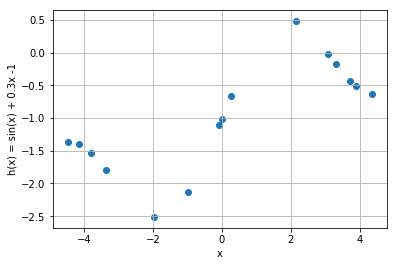

In [564]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(low = -5, high = 5, size = 15)
#x = np.array([1.2653435, 3.5525551, 1.76258328,  3.21414106,  -1.75377614,  -3.29902171,
#                      1.98245533, -1.96771599, 4.25480777, -0.90196087, -0.33392334, -2.73882589,
#                      -0.96442273, 2.30170356, -0.96141643])
y = np.sin(x) + 0.3 * x -1

plt.xlabel('x')
plt.ylabel('h(x) = sin(x) + 0.3x -1')
plt.grid(True)
plt.scatter(x, y)
plt.show()

3. With $\lambda= 0$, train your model on $D_n$ with the algorithm **regression_gradient**. Then plot on the interval [−10, 10]: the points from the training set $D_n$, the curve $h(x)$, and the curve of the function learned by your model using gradient descent. Make a clean legend. **Remark**: The solution you found with gradient descent should converge to the straight line that is closer from the n points (and also to the analytical solution). Be ready to adjust your step-size (small enough) and number of iterations (large enough) to reach this result.

4. on the same graph, add the predictions you get for intermediate value of $\lambda$, and for a large value of $\lambda$. Your plot should include the value of $\lambda$ in the legend. It should illustrate qualitatively what happens when $\lambda$ increases.

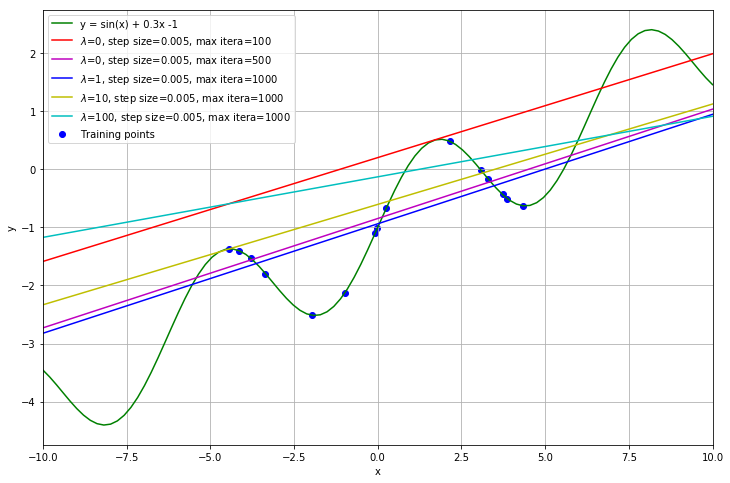

In [565]:
if x.ndim <= 1:
    x = x.reshape(-1, 1)
if y.ndim <= 1:
    y = y.reshape(-1, 1)

data = np.hstack((x, y))

plt.figure(figsize=(12, 8))

plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#plot training points
plt.scatter(x, y, color='b', label="Training points")
x1 = np.linspace(-10, 10, 100)

#plot the curve  h(x)
y1 = np.sin(x1) + 0.3 * x1 - 1
plt.plot(x1, y1, '-g', label="y = sin(x) + 0.3x -1")

#plot the curve of the learned function
def plotLearnedFunction(data, lamb, alpha, maxIterations, color):
    ridge = ridgeRegression(lamb, alpha, maxIterations)
    X, y = ridge.fit(data)
    m, n = np.shape(X)
    theta = np.ones(n)
    theta_result = ridge.batchGradientDescent(X, y, theta)
    y2 =  theta_result[0] * x1 + theta_result[1]
    plt.plot(x1, y2, color, label="$\lambda$={}, step size={}, max itera={}".format(lamb, alpha, maxIterations))
    
plotLearnedFunction(data, 0, 0.005, 100, 'r')
plotLearnedFunction(data, 0, 0.005, 500, 'm')
plotLearnedFunction(data, 1, 0.005, 1000, 'b')
plotLearnedFunction(data, 10, 0.005, 1000, 'y')
plotLearnedFunction(data, 100, 0.005, 1000, 'c')
plt.legend(loc="upper left")
plt.show()

5. Draw another dataset $D_{test}$ of 100 points by following the same procedure as $D_n$. Train your linear model on $D_n$ for $\lambda$ taking values in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]. For each value of $\lambda$, measure the average quadratic loss on Dtest. Report these values on a graph with on the x-axis and the loss value on the y-axis.

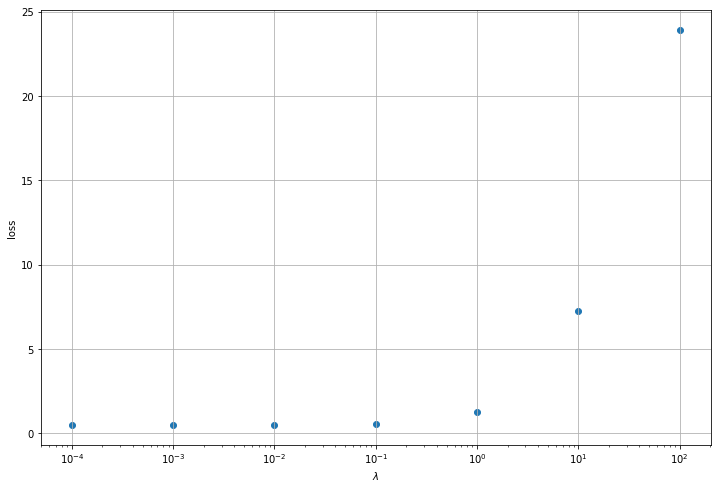

In [566]:
x1 = np.random.uniform(low = -5, high = 5, size = 100)
y1 = np.sin(x1) + 0.3 * x1 -1

if x1.ndim <= 1:
    x1 = x1.reshape(-1, 1)
if y1.ndim <= 1:
    y1 = y1.reshape(-1, 1)
data = np.hstack((x1, y1))

alpha, maxIterations = 0.005, 1000
lambs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
loss_results = np.zeros(len(lambs))

plt.figure(figsize=(12, 8))

for idx, lamb in enumerate(lambs):
    ridge = ridgeRegression(lamb, alpha, maxIterations)
    X, t = ridge.fit(data)
    m, n = np.shape(X)
    theta = np.ones(n)
    theta_result = ridge.batchGradientDescent(X, t, theta)
    loss_result = ridge.loss(X, t, theta_result, m)
    loss_results[idx] = loss_result

plt.xlabel("$\lambda$")
plt.ylabel("loss")
plt.grid(True)
plt.xscale('log')
plt.scatter(lambs, loss_results)
plt.show()

6. Use the technique studied in problem 1.3 above to learn a non-linear function of $x$. Specifically, use Ridge regression with the fixed preprocessing $ \phi_{poly^l}$ described above to get a polynomial regression of order $l$. Apply this technique with $\lambda= 0.01$ and different values of $l$. Plot a graph similar to question 2.2 with all the prediction functions you got. Don’t plot too many functions to keep it readable and precise the value of $l$ in the legend.

degree =  2
degree =  3
degree =  4
degree =  5
[array([ 0.17979801, -0.06453734]), array([ 0.76823887, -0.07355407, -0.04039937]), array([ 0.79093452, -0.19238768, -0.04025217,  0.0074961 ]), array([ 1.33544549, -0.18836868, -0.14236338,  0.00757341,  0.00407555])]


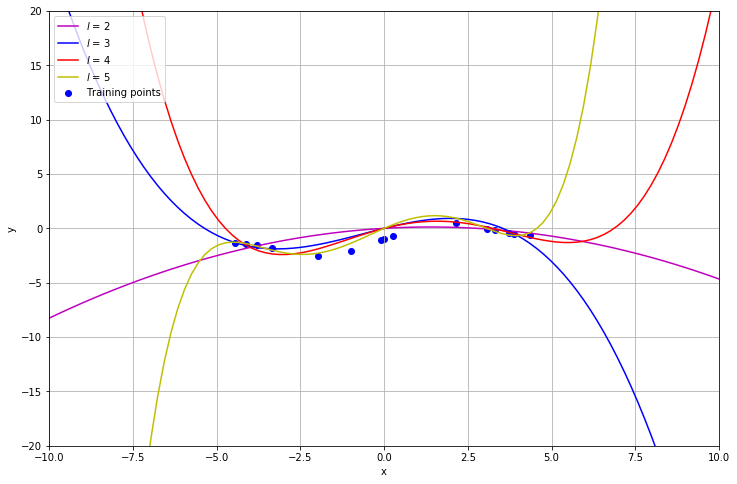

In [567]:
if x.ndim <= 1:
    x = x.reshape(-1, 1)
if y.ndim <= 1:
    y = y.reshape(-1, 1)
data = np.hstack((x, y))

plt.figure(figsize=(12, 8))
plt.xlim(-10, 10)
plt.ylim(-20, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

#plot training points
plt.scatter(x, y, color='b', label="Training points")
x2 = np.linspace(-10, 10, 100)

#plot the curve  h(x)
#y1 = np.sin(x1) + 0.3 * x1 - 1
#plt.plot(x1, y1, '-g', label="y = sin(x) + 0.3x -1")

#plot the curve of the learned function
def plotLearnedPolyFunction(data, lamb, alpha, maxIterations, color, degree):
    ridge = ridgeRegression(lamb, alpha, maxIterations)
    X, y = ridge.fitPolynomial(data, degree)
    print("degree = ", degree)
    m, n = np.shape(X)
    theta = np.ones(n)
    theta_result = ridge.batchGradientDescent(X, y, theta)
    theta_result = theta_result[:-1]
    f = 0
    for i in range(degree):
        f += theta_result[i] * np.power(x2, i+1)
    plt.plot(x2, f, color, label="$l$ = {}".format(degree))
    
    return theta_result

#plotLearnedPolyFunction(data, 0.01, 0.005, 1000, 'r', 1)
theta_results = []
theta_results.append(plotLearnedPolyFunction(data, 0.01, 0.001, 10000000, 'm', 2))
theta_results.append(plotLearnedPolyFunction(data, 0.01, 0.0001, 10000000, 'b', 3))
theta_results.append(plotLearnedPolyFunction(data, 0.01, 0.00001, 10000000, 'r', 4))
theta_results.append(plotLearnedPolyFunction(data, 0.01, 0.000001, 10000000, 'y', 5))
#plotLearnedPolyFunction(data, 0.01, 0.00000001, 100000, 'k', 6)
#plotLearnedPolyFunction(data, 0.01, 0.000000001, 1000000, 'c', 7)
print(theta_results)
plt.legend(loc="upper left")
plt.show()

7. Comment on what happens when $l$ increases. What happens to the empirical risk ( loss on $D_n$ ), and to the true risk ( loss on $D_{test}$ )?

lost_list of training set =  [0.74434798 0.50524848 0.41891469 0.39032781]


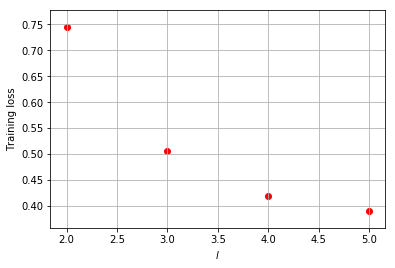

In [568]:
def polynomialCal(x, theta, degree):
    y = 0
    for i in range(degree):
        y += theta[i] * np.power(x, (i+1))
    return y

def calculateLoss(dataX, dataY):
    #for four type polynomial curve
    l_list = [2, 3, 4, 5]
    total_train_loss = np.zeros(4)
    for i in range(len(theta_results)):
        for idx, data in enumerate(dataX):
            total_train_loss[i] += np.power(polynomialCal(data, theta_results[i], len(theta_results[i])) - dataY[idx], 2)
        total_train_loss[i] += np.sum(np.multiply(theta_results[i], theta_results[i]))
        total_train_loss[i] /= len(dataX)
    return total_train_loss

plt.xlabel("$l$")
plt.ylabel("Training loss")
plt.grid(True)
lost_list = calculateLoss(dataX = x, dataY = y)
print("lost_list of training set = ", lost_list)
plt.scatter(l_list, lost_list, c="r")
plt.show()

lost_list of testing set =  [0.77097739 0.53716215 0.47348535 0.37246722]


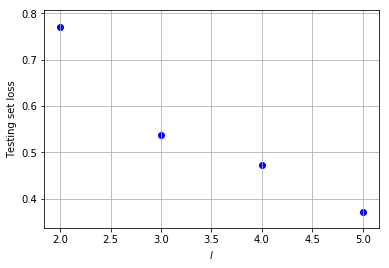

In [569]:
plt.xlabel("$l$")
plt.ylabel("Testing set loss")
plt.grid(True)
lost_list = calculateLoss(dataX = x1, dataY = y1)
print("lost_list of testing set = ", lost_list)
plt.scatter(l_list, lost_list, c="b")
plt.show()

#### Answer

When $l$ increases, the model's capacity will become better and better. The empirical risk on $D_n$ will decrease. And the true risk on $D_{test}$ will increase.